# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Изучение общей информации

#### 1.1. Импорт библиотек

In [1]:
# импорт библиотеки pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 1.2. Информация о данных

In [2]:
# формирование DataFrame
property_sale = pd.read_csv('/datasets/real_estate_data.csv')

Посмотрим общую информацию о данных:

In [3]:
property_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around3000	ponds_nearest	days_exposition    23699 non-null object
dtypes: object(1)
memory usage: 185.3+ KB


При формировании DataFrame не произошло разделение данных по колонкам. Проверим, какой разделитель колонок здесь 

In [4]:
property_sale.head(5)

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


In [5]:
#формирование DataFrame с учетом разделителя колонок
property_sale =  pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
# вывод общей информации
property_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Общее описание данных: всего в таблице 22 столбца. ипы данных разные: int64, float64, object. Возможно, в дальнейшем получится заменить тип данных float64 на int64.

Описание столбцов: 
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

#### 1.3. Знакомство с данными.

In [6]:
property_sale.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Вывод

Каждая строка таблицы содержит информацию об одном объекте недвижимости, выставленном на продажу. Идентификатора строк нет, соответственно возможно наличие дублей строк.

В исходном файле было разделение колонок "\t", этот момент был учтен при формировании DataFrame. Общая информация показала необходимость проведения более подробного анализа данных для возможной замены типов колонок float на int. Также при анализе первых строк таблицы "глазами" обнаружено наличие пропусков в данных. Проблем с регистром в данных при первом взгляде нет, но лучше проверить.
Соответствнно получаем: данные сырые не готовы для анализа, требуется предобработка.

### Шаг 2. Предобработка данных

#### 2.1.Проверка таблицы на наличие пропусков и дубликатов

In [7]:
# проверка на наличие пропусков всей таблицы
print('Количество значений NaN: {}'.format(property_sale.isna().sum()))

Количество значений NaN: total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [8]:
# вычисление количества дубликатов
print('Количество дубликатов: {}'.format(property_sale.duplicated().sum()))

Количество дубликатов: 0


На данном шаге дубликатов не выявлено, но обнаружено наличие пропусков в нескольких колонках (ceiling_height,floors_total, living_area,is_apartment,kitchen_area,balcony,locality_name,airports_nearest, cityCenters_nearest,parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition).

История пропусков в колонках разная. Рассмотрим пропуски в колонках с учетом логики заполнения колонок и анализа заполнения всей строки.

#### 2.2. Анализ и заполнение пропусков в столбцах

Рассмотрим подробнее каждый столцец таблицы и при необходимости и возможности произведем заполнение пропусков в данных.
Для столбцов, которые скорее всего содержат большое количество разных значений будем использовать метод describe(), а для остальных метод value_counts().

**Столбец total_images** не содержит пропусков. Посмотрим значения.

In [9]:
# выборка уникальных значений total_images
property_sale['total_images'].value_counts()

10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
14     986
4      986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
28       4
32       4
50       3
29       3
31       2
35       2
30       2
27       2
37       1
39       1
25       1
42       1
Name: total_images, dtype: int64

Все значения целые неотрицательные - столбец заполнен корректно. 

**Столбец last_price** не содержит пропусков. Посмотрим на заполнение

In [10]:
property_sale['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Столбец заполнен неотрицательными ненулевыми данными - корректное заполнение. Однако, минимальное значение не похоже на стоимость квартиры, скорее на сведения об аренде.

**Столбец total_area** не содержит пропусков. Посмотрим на заполнение

In [11]:
property_sale['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Столбец заполнен неотрицательными ненулевыми данными - корректное заполнение.

**Столбец first_day_exposition** не содержит пропусков. Посмотрим на заполнение

In [12]:
property_sale['first_day_exposition'].describe()

count                   23699
unique                   1491
top       2018-02-01T00:00:00
freq                      368
Name: first_day_exposition, dtype: object

Столбец содержит сведения о дате и времени, но тип object, надо будет изменить тип.

**Столбец rooms** не содержит пропусков. Посмотрим на заполнение

In [13]:
# выборка уникальных значений rooms
property_sale['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

Столбец заполнен неотрицательными данными - корректное заполнение. Однако, есть объекты с большим количеством комнат, скорее всего комуналки и продается не квартира, а комната.

**Столбец высота потолка(ceiling_height)**. Пропусков довольно много,кроме того, этот параметр ожет влиять на стоимость. Такое количество данных не убрать из анализа, соответственно необходимо продумать заполнение пропусков.

In [14]:
# выборка уникальных значений ceiling_height
property_sale['ceiling_height'].value_counts()

2.50      3515
2.60      1646
2.70      1574
3.00      1112
2.80       993
          ... 
27.50        1
5.00         1
3.59         1
4.80         1
100.00       1
Name: ceiling_height, Length: 183, dtype: int64

In [15]:
property_sale['ceiling_height'].describe().round(2)

count    14504.00
mean         2.77
std          1.26
min          1.00
25%          2.52
50%          2.65
75%          2.80
max        100.00
Name: ceiling_height, dtype: float64

Минимальное значение 1 м, это не похоже на высоту потолка, скорее всего опечатка при вводе данных. Максимальное значение также не похоже на высоту потолка 100м). Судя по данным, выведенным методом describe(), в основном значения корректные.

In [16]:
# замена пропущенных в столбце ceiling_height значений
property_sale['ceiling_height'] = property_sale['ceiling_height'].fillna(2.65)
# проверка выполнения замены
'Количество значений NaN: {}'.format(property_sale['ceiling_height'].isna().sum())

'Количество значений NaN: 0'

Посмотрим как изменился анализ после замены пропусков.

In [17]:
property_sale['ceiling_height'].describe().round(2)

count    23699.00
mean         2.72
std          0.99
min          1.00
25%          2.60
50%          2.65
75%          2.70
max        100.00
Name: ceiling_height, dtype: float64

Увеличился Q1, но уменьшился Q3. Теперь пропусков нет, можно продолжить анализ.

**Столбец  количество этажей в доме(floors_total)** Пропуски в столбце есть, посмотрим есть ли возможность их заполнения.

In [18]:
# строки с пропущенными значениями в столбце floors_total
property_sale[property_sale['floors_total'].isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,2.65,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.65,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.65,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,2.65,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,2.65,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.80,NaN,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,2.65,NaN,31.70,20,NaN,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,2.65,NaN,45.38,6,NaN,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,2.65,NaN,50.40,18,NaN,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


In [19]:
# выборка уникальных значений floors_total
property_sale['floors_total'].value_counts()

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
29.0       1
60.0       1
33.0       1
52.0       1
37.0       1
34.0       1
Name: floors_total, dtype: int64

In [20]:
property_sale['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Верхний ус: 16+1.5*(16-5) = 29.5
Нижний ус: 5-1.5*(16-5) = -8.5 возьмем минимальное значение

Закономерности при анализе "глазами" не удалось выявить. Количество пропусков незначительное. Пропуск может быть важен в случае, если это последний этаж, но вряд ли можно достоверно это определить по номеру этажа квартиры. Пока оставляем пропуски.

**Столбец  жилая площадь(living_area)** Пропуски в столбце есть, посмотрим, есть ли возможность их заполнения.

In [21]:
# строки с пропущенными значениями в столбце living_area
property_sale[property_sale['living_area'].isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.65,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,2.65,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5950000.0,80.30,2018-07-03T00:00:00,3,2.70,12.0,NaN,5,NaN,...,NaN,NaN,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23663,12,6400000.0,88.00,2018-01-12T00:00:00,4,2.55,10.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.60,2018-02-08T00:00:00,1,2.80,9.0,NaN,2,NaN,...,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.00,2017-12-08T00:00:00,1,2.65,9.0,NaN,4,NaN,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Жилая площадь - важный параметр недвижимости, замена на ноль для данного параметра невозможна, ведь не может быть такой квартиры. Замена на медиану или среднее также будет некорректна, так как может исказить анализ. Количество пропусков 1903, что составляет ___ %. При анализе "галазами" выявлено, что многие строки с пропуском в данном столбце содержат еще много пропусков. Скорее всего придется убрать эти строки из таблицы при анализе.

**Столбец  количество балконов** Количество пропусков в столбце довольно большое(около половины).

In [22]:
# строки с пропущенными значениями в столбце balcony
property_sale['balcony'].isna().sum()

11519

In [23]:
# объявления с заполненным значением ноль столбцом balcony
property_sale.loc[property_sale['balcony'] == 0]['balcony'].count()


3758

In [24]:
# объявления с ненулевым количеством балконов
property_sale.loc[property_sale['balcony'] != 0]['balcony'].count()

8422

Получаем, что заполненных и незаполненных значений столбца примерно провну. При этом нулевые значения тоже есть. Скорее всего пропуски связаны с ошибкой в выгрузке, т.е. при отсутствии балкона выгружается NaN. Заменим пропущенные значения на ноль.

In [25]:
# выборка уникальных значений balcony
property_sale['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In [26]:
# замена пропущенных в столбце balcony значений на 0
property_sale['balcony'] = property_sale['balcony'].fillna(0)
# проверка выполнения замены
'Количество значений NaN: {}'.format(property_sale['balcony'].isna().sum())

'Количество значений NaN: 0'

**Столбец  is_apartment** Пропущенные значения в столбце есть и их очень много, даже больше половины. Логично предположить, что здесь либо ошибка в выгрузке(неапартаменты - пустое значение, либо человеческий фактор)

In [27]:
# замена пропущенных значений нулевыми и анализ строк с ненулевыми значениями
property_sale['is_apartment'] = property_sale['is_apartment'].fillna(False)
property_sale.loc[property_sale['is_apartment'] != 0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
543,11,12790000.0,56.60,2018-11-06T00:00:00,2,3.50,3.0,29.400000,1,True,...,NaN,0.0,Петергоф,35248.0,30437.0,3.0,53.0,3.0,22.0,NaN
916,11,8183000.0,70.00,2018-01-11T00:00:00,2,3.12,3.0,40.000000,3,True,...,NaN,2.0,Санкт-Петербург,45796.0,21729.0,0.0,NaN,1.0,754.0,179.0
1109,1,34878556.0,95.80,2014-12-09T00:00:00,2,2.65,6.0,58.300000,5,True,...,20.00,1.0,Санкт-Петербург,21860.0,318.0,2.0,160.0,3.0,569.0,1572.0
1608,12,2150000.0,20.10,2019-01-30T00:00:00,1,2.65,9.0,NaN,1,True,...,NaN,0.0,Санкт-Петербург,26646.0,12147.0,0.0,NaN,0.0,NaN,13.0
2759,11,7500000.0,152.00,2018-07-27T00:00:00,3,3.00,3.0,NaN,1,True,...,NaN,1.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,7.0
2975,9,4931398.0,42.90,2018-07-23T00:00:00,1,3.15,4.0,20.390000,3,True,...,10.29,0.0,Санкт-Петербург,44870.0,20802.0,0.0,NaN,1.0,792.0,273.0
3067,13,6600000.0,95.00,2018-09-08T00:00:00,2,4.50,7.0,45.000000,7,True,...,25.00,2.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,96.0
3816,4,4779000.0,53.10,2016-05-16T00:00:00,1,2.65,13.0,19.800000,6,True,...,15.90,2.0,Санкт-Петербург,19396.0,4516.0,0.0,NaN,1.0,826.0,60.0
3951,10,4300000.0,50.00,2019-04-20T00:00:00,1,3.00,11.0,17.000000,9,True,...,12.00,2.0,Санкт-Петербург,10143.0,11367.0,0.0,NaN,0.0,NaN,NaN
4339,19,6900000.0,72.00,2019-03-25T00:00:00,3,3.50,4.0,70.000000,1,True,...,NaN,0.0,Санкт-Петербург,31487.0,4466.0,2.0,353.0,1.0,439.0,22.0


In [28]:
 #Замена нулевых значений на False
property_sale.loc[property_sale['is_apartment'] == 0, 'is_apartment'] = False

Получили, что апартаментов всего 50 объявлений в данной выборке. Остальное квартиры.

**Столбец  studio**. Пропущенных значений нет, посмотрим на заполнение:

In [29]:
# выборка уникальных значений studio
property_sale['studio'].value_counts()

False    23550
True       149
Name: studio, dtype: int64

Столбец заполнен корректно. Заметим, в выборке значительно преобладают квартиры не студии.

**Столбец  площадь кухни (kitchen_area)**. Пропуски в столбце есть. Существенный параметр для анализа.

In [30]:
# вычисление procent_value - процентного количества значений пропусков в столбце kitchen_area
# так как есть деление, дабавим для подстаховки try-except
try:
    procent_value = property_sale['kitchen_area'].isna().sum() / property_sale['kitchen_area'].count() *100
    print('Процент количества пустых значений  равен {:.2f}%'.format(procent_value))
except:
    print('Отношение не вычислить, есть нулевые значения для деления')  

Процент количества пустых значений  равен 10.63%


In [31]:
property_sale[(property_sale['kitchen_area'].isna() & property_sale['open_plan'] == True)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
349,4,2320000.0,25.0,2017-09-27T00:00:00,0,2.65,14.0,17.0,1,False,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
508,0,3375000.0,34.4,2017-03-28T00:00:00,0,2.65,26.0,24.3,19,False,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
780,9,2600000.0,26.1,2018-02-20T00:00:00,0,2.65,18.0,NaN,8,False,...,NaN,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
839,14,1900000.0,35.0,2017-04-14T00:00:00,0,2.70,5.0,15.0,3,False,...,NaN,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0
946,5,2200000.0,23.0,2016-09-27T00:00:00,0,2.65,27.0,18.0,7,False,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21299,13,2450000.0,28.5,2017-11-22T00:00:00,0,2.65,12.0,18.0,7,False,...,NaN,2.0,Санкт-Петербург,20381.0,19383.0,0.0,NaN,1.0,579.0,73.0
21628,9,3900000.0,34.0,2017-03-18T00:00:00,0,2.65,20.0,24.0,10,False,...,NaN,2.0,Санкт-Петербург,15506.0,13615.0,0.0,NaN,1.0,767.0,320.0
22573,8,2250000.0,24.0,2017-09-28T00:00:00,0,2.65,12.0,15.0,3,False,...,NaN,2.0,городской посёлок Новоселье,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23442,0,2500000.0,27.7,2017-09-28T00:00:00,0,2.65,24.0,18.0,4,False,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0


In [32]:
# вычисление  строк с одновременно пропущенными значениями в полях kitchen_area и living_area и при этом студий
property_sale[(property_sale['kitchen_area'].isna() & property_sale['living_area'].isna() & property_sale['studio'] == True)]   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
608,2,1850000.0,25.0,2019-02-20T00:00:00,0,2.65,10.0,NaN,7,False,...,NaN,0.0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
2409,4,1980000.0,27.0,2018-03-23T00:00:00,0,2.65,18.0,NaN,4,False,...,NaN,0.0,посёлок Петро-Славянка,20605.0,27165.0,0.0,NaN,2.0,663.0,75.0
3147,7,2170000.0,31.0,2017-12-30T00:00:00,0,2.60,12.0,NaN,12,False,...,NaN,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,198.0
3874,13,1700000.0,21.4,2015-02-11T00:00:00,0,2.70,3.0,NaN,2,False,...,NaN,0.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4901,5,2200000.0,24.0,2018-10-22T00:00:00,0,2.65,NaN,NaN,6,False,...,NaN,0.0,посёлок Бугры,NaN,NaN,NaN,NaN,NaN,NaN,51.0
5187,5,3300000.0,25.4,2018-11-02T00:00:00,0,2.65,NaN,NaN,15,False,...,NaN,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,3.0
5958,1,3200000.0,30.3,2018-09-07T00:00:00,0,2.65,NaN,NaN,13,False,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,68.0
8454,7,2250000.0,19.0,2019-03-12T00:00:00,0,3.00,6.0,NaN,2,False,...,NaN,0.0,Санкт-Петербург,12430.0,7316.0,1.0,238.0,3.0,374.0,44.0
18028,11,3500000.0,31.0,2019-04-17T00:00:00,0,2.65,25.0,NaN,2,False,...,NaN,0.0,Санкт-Петербург,21460.0,16788.0,0.0,NaN,1.0,170.0,NaN
23554,15,3350000.0,26.0,2018-09-07T00:00:00,0,2.65,19.0,NaN,8,False,...,NaN,0.0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0


In [33]:
# вычисление  строк с одновременно пропущенными значениями в полях kitchen_area и living_area 
property_sale[(property_sale['kitchen_area'].isna() & property_sale['living_area'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.65,9.0,NaN,2,False,...,NaN,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,False,...,NaN,0.0,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.65,22.0,NaN,3,False,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06T00:00:00,1,2.65,13.0,NaN,13,False,...,NaN,0.0,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23632,20,5000000.0,38.0,2018-06-23T00:00:00,1,2.55,16.0,NaN,15,False,...,NaN,1.0,Санкт-Петербург,31118.0,7257.0,1.0,241.0,1.0,230.0,113.0
23642,14,5950000.0,80.3,2018-07-03T00:00:00,3,2.70,12.0,NaN,5,False,...,NaN,0.0,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23663,12,6400000.0,88.0,2018-01-12T00:00:00,4,2.55,10.0,NaN,1,False,...,NaN,0.0,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.6,2018-02-08T00:00:00,1,2.80,9.0,NaN,2,False,...,NaN,0.0,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Довольно много (1464) строк в пропущенными значениями в двух ключевых колонках : жилая площадь и площадь кухни. Соответственно для них корректную замену не выполнить.
Оставим эти пропуски, чтобы не испортить данные. Проблема с пропусками скорее всего связана с ошибками в заполнении пользователями данных на сайте.

**Столбец  locality_name**. Пропуски в колонке есть, но их количество несущественно, однако замена может повлиять на расчеты. Оставим поле пустым. Посмотрим на заполнение столбца: 

In [34]:
# выборка уникальных значений locality_name
property_sale['locality_name'].value_counts()

Санкт-Петербург                                            15721
посёлок Мурино                                               522
посёлок Шушары                                               440
Всеволожск                                                   398
Пушкин                                                       369
                                                           ...  
посёлок Левашово                                               1
садоводческое некоммерческое товарищество Лесная Поляна        1
поселок Гаврилово                                              1
посёлок при железнодорожной станции Вещево                     1
деревня Пустынка                                               1
Name: locality_name, Length: 364, dtype: int64

Посмотрим весь список

In [35]:
# Формирование списка из всех уникальных зачений столбца .  
name_list = property_sale['locality_name'].unique() #получим уникальные значения 
name_list

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [36]:
# приведем к одному регисту
property_sale['locality_name'] = property_sale['locality_name'].str.lower()

In [37]:
# замена ё на е
property_sale['locality_name'] =property_sale.loc[:,'locality_name'].replace('ё', 'е', regex = True)

Избавимся от дублей названий населенных пунктов, для этого исключим из строк слова: деревня, поселок и тд

In [38]:
property_sale['locality_name'] =property_sale.loc[:,'locality_name'].replace('деревня ', '', regex = True)

In [39]:
property_sale['locality_name'] =property_sale.loc[:,'locality_name'].replace('поселок городского типа ', '', regex = True)

In [40]:
property_sale['locality_name'] =property_sale.loc[:,'locality_name'].replace('городской поселок ', '', regex = True)

In [41]:
property_sale['locality_name'] =property_sale.loc[:,'locality_name'].replace('поселок ', '', regex = True)

In [42]:
property_sale['locality_name'] =property_sale.loc[:,'locality_name'].replace('коттеджный поселок ', '', regex = True)

In [43]:
property_sale['locality_name'] =property_sale.loc[:,'locality_name'].replace('коттеджный ', '', regex = True)

In [44]:
# выборка уникальных значений locality_name
property_sale['locality_name'].value_counts()

санкт-петербург    15721
мурино               590
кудрово              472
шушары               440
всеволожск           398
                   ...  
пикколово              1
шпаньково              1
русско                 1
нижние осельки         1
ропша                  1
Name: locality_name, Length: 312, dtype: int64

До замен было 364 уникальных значения, сейчас 312. Пропуски оставим.

Пропуски в полях **airports_nearest, cityCenters_nearest,parks_around3000, parks_nearest, ponds_around3000, ponds_nearest** скорее всего связаны отсутствием точного адреса объекта, либо отсутствия поблизости от объекта аэропорта, парка и тд. Думаю, корректно заменить пропущенные значения на ноль в столбцах parks_around3000 и ponds_around3000 - т.е. рядом просто нет парков и водоемов. В столбцах airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest пропуски не заменить на логически понятные, оставим их. 

In [45]:
# вычисление  строк с одновременно пропущенными значениями в полях parks_around3000 и parks_nearest 
property_sale[(property_sale['parks_around3000'].isna() & property_sale['parks_nearest'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,...,9.10,0.0,янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,...,8.81,0.0,мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.65,5.0,30.00,5,False,...,9.00,0.0,сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,...,11.00,2.0,кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.65,9.0,NaN,2,False,...,NaN,0.0,коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,False,...,5.50,0.0,дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.65,5.0,17.50,4,False,...,6.00,0.0,тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5.0,38.00,4,False,...,8.50,0.0,тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,29.70,1,False,...,NaN,0.0,село рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# вычисление  строк с одновременно пропущенными значениями в полях parks_around3000 и parks_nearest 
property_sale[(property_sale['parks_nearest']<=3000 & property_sale['parks_around3000'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [47]:
# вычисление  строк с одновременно пропущенными значениями в полях ponds_around3000 и ponds_nearest 
property_sale[(property_sale['ponds_around3000'].isna() & property_sale['ponds_nearest'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,...,9.10,0.0,янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,...,8.81,0.0,мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.65,5.0,30.00,5,False,...,9.00,0.0,сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,...,11.00,2.0,кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.65,9.0,NaN,2,False,...,NaN,0.0,коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,False,...,5.50,0.0,дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.65,5.0,17.50,4,False,...,6.00,0.0,тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5.0,38.00,4,False,...,8.50,0.0,тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,29.70,1,False,...,NaN,0.0,село рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# вычисление  строк с одновременно пропущенными значениями в полях parks_around3000 и parks_nearest 
property_sale[(property_sale['ponds_nearest']<=3000 & property_sale['ponds_around3000'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [49]:
# замена пропущенных в столбце parks_around3000 значений на 0
property_sale['parks_around3000'] = property_sale['parks_around3000'].fillna(0)
# проверка выполнения замены
'Количество значений NaN: {}'.format(property_sale['parks_around3000'].isna().sum())

'Количество значений NaN: 0'

In [50]:
# замена пропущенных в столбце ponds_around3000 значений на 0
property_sale['ponds_around3000'] = property_sale['ponds_around3000'].fillna(0)
# проверка выполнения замены
'Количество значений NaN: {}'.format(property_sale['ponds_around3000'].isna().sum())

'Количество значений NaN: 0'

Причина возникновения такого большого количества пропусков в этих колонках скорее всего связяна с ошибкой в выгрузке, судя по всему, при выборе/вводе адреса он не всегда привязывается к карте корректно, соответственно не посчитать расстояния до парка и тд., либо адрес вводят не полностью (например без указания номера дома).

**Столбец days_exposition.** Пропуски есть. Сначала изучим, какие значения в столбце.

In [51]:
# выборка уникальных значений days_exposition
property_sale['days_exposition'].value_counts()

45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
1110.0      1
1049.0      1
951.0       1
693.0       1
773.0       1
Name: days_exposition, Length: 1141, dtype: int64

In [52]:
# выборка нулевых значений days_exposition
property_sale.loc[property_sale['days_exposition'] == 0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Судя по полученным результатам (многообразие значений по количеству дней, но нет нулевых), логично предположить, что пропущенные значения это нули. Т.е. объявлению менее дня, либо его выставили и сняли за период менее дня. Выполним замену на ноль.

In [53]:
# замена пропущенных в столбце days_exposition значений на 0
property_sale['days_exposition'] = property_sale['days_exposition'].fillna(0)
# проверка выполнения замены
'Количество значений NaN: {}'.format(property_sale['days_exposition'].isna().sum())

'Количество значений NaN: 0'

#### 2.3. Замена типов столбцов

Для ускорения работы с таблицей уменьшим ее размер засчет изменения типов столбцов, где это возможно.
Для колонок, содержащих сведения о площади, замена на целое число некорректна, так как это нарушит расчет цены за квадратный метр.
Но в таблице есть колонки, содержащие сведения о количестве (фотографий, комнат, балконов и дней в экспозиции). Для таких колонок замена типа столбца на integer уместна.
Сформируем список таких столюцов и циклом по нему заменим тип данных. Далее заменим тип колонки first_day_exposition.

In [54]:
# колонки, в которых будем менять тип данных
type_list = ['total_images', 'rooms', 'floor','floors_total', 'balcony', 'days_exposition', 'parks_around3000', 'ponds_around3000']

In [55]:
# выполнение замены типов int64 и float64 на integer
for i in type_list:
    property_sale[i]= pd.to_numeric(property_sale[i], errors='coerce', downcast = 'integer')

In [56]:
#замена типа данных object на datetime
property_sale['first_day_exposition']= pd.to_datetime(property_sale['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Проверим полученный результат:

In [57]:
property_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int8
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int8
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int8
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null int8
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null int8
parks_nearest           8079 non-null float64
ponds_around3000 

Колонка заполнилась только сведениями о дате. Получается, что время было везде нулевым.

Типы данных в колонках заменены. На данный момент все типы колонок соответствуют содержанию и не избыточны.

### Вывод

Была произведена предобработка данных таблицы, включающая в себя анализы и по возможности замену пропусков, поиск и устранение дублей, а также замену типов колонок.
- Были выявлены и устранены дубли в названиях населенных пунктов (такие как деревня Кудрово и Кудрово).
- Устранены пропуски в столбцах: ceiling_height, balcony, is_apartment, day_excposition, parks_around3000, ponds_around3000
- Оставлены пропуски в столбцах:ponds_nearest, ponds_nearest, cityCenters_nearest, airports_nearest, locality_name, kitchen_area, living_area, floors_total
- Изменены типы данных float на int  и object на datetime.

При анализе значений по столбцам были обнаружены нехарактерные значения в колонке высота потолка, данные значения скорее всего являтся выбросами и могут испоритить анализ.
Также было выявлено наличие квартир с большим числом комнат, возможно, в тех случаях идет продажа комнаты в комуналке, а не квартиры.
Список населенных пунктов содержит дачные кооперативы, скорее всего это родатся дачи или дома на дачных участках.


Данные готовы для дальнейшей работы.

### Шаг 2. Вычисление дополнительных значений

Для нахождения цены квадратного метра разделим стоимость квартиры на общую площадь.

In [58]:
#добавление столбца - цена за квадратный метр (price_meter) . для цены корректно отображать окруление до 2-х знаков
property_sale['price_meter'] = (property_sale['last_price'] / property_sale['total_area']).round(2)

In [59]:
#анализ данных столбца
property_sale['price_meter'].describe()

count    2.369900e+04
mean     9.942166e+04
std      5.030680e+04
min      1.118300e+02
25%      7.658547e+04
50%      9.500000e+04
75%      1.142563e+05
max      1.907500e+06
Name: price_meter, dtype: float64

Значения в столбце похожи на реальные, но в минимуме странное значение слишком маленькое для цены за квадратный метр.

In [60]:
# проверка результата
property_sale.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,0,120370.37
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,2,шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.79
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.71
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,...,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.10
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.00


Выведем в отдельных колонках: день недели, месяц и год первого дня объявления.

In [61]:
# добавление колонок день_недели/месяц/год дня публикации
property_sale['first_day_exposition_d'] = property_sale['first_day_exposition'].dt.weekday
property_sale['first_day_exposition_m'] = pd.DatetimeIndex(property_sale['first_day_exposition']).month
property_sale['first_day_exposition_y'] = pd.DatetimeIndex(property_sale['first_day_exposition']).year

In [62]:
# проверка результата
property_sale.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,first_day_exposition_d,first_day_exposition_m,first_day_exposition_y
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,16028.0,1,482.0,2,755.0,0,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,18603.0,0,NaN,0,NaN,81,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,13933.0,1,90.0,2,574.0,558,92785.71,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,...,6800.0,2,84.0,3,234.0,424,408176.10,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,8098.0,2,112.0,1,48.0,121,100000.00,1,6,2018


Добавим столбец доли жилой площади относительно всей площади объекта

In [63]:
#добавление столбца - доля жилой площади (share_living_area) 
property_sale['share_living_area'] = (property_sale['living_area'] / property_sale['total_area']).round(2)

Добавим столбец доли площади кухни относительно всей площади объекта

In [64]:
#добавление столбца - доля площади кухни (share_kitchen_area) 
property_sale['share_kitchen_area'] = (property_sale['kitchen_area'] / property_sale['total_area']).round(2)

In [65]:
# проверка результата
property_sale.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,first_day_exposition_d,first_day_exposition_m,first_day_exposition_y,share_living_area,share_kitchen_area
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2,755.0,0,120370.37,3,3,2019,0.47,0.23
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,NaN,0,NaN,81,82920.79,1,12,2018,0.46,0.27
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,90.0,2,574.0,558,92785.71,3,8,2015,0.61,0.15
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,...,84.0,3,234.0,424,408176.10,4,7,2015,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1,48.0,121,100000.00,1,6,2018,0.32,0.41


Выделим категории для столбца этажи, так как они скорее всего влияют на стоимость.


In [66]:
floor_list=['первый', 'последний', 'другой']

In [67]:
#срез данных - перый этаж
first_floor = property_sale.query('floor ==1')
first_floor['floor'].count()

2917

In [68]:
last_floor = property_sale.query('floor==floors_total')
last_floor['floor'].count()

3361

In [69]:
#создание нового столбца floor_type и заполнение для первого этажа
property_sale.loc[property_sale['floor'] ==1, 'floor_type'] = 'первый'

In [70]:
# заполнение столбца floor_type для последнего этажа 
property_sale.loc[property_sale['floor'] ==property_sale['floors_total'], 'floor_type'] = 'последний'

In [71]:
# замена пропущенных в столбце floor_type значений на "другой"
property_sale['floor_type'] = property_sale['floor_type'].fillna('другой')
# проверка выполнения замены
'Количество значений NaN: {}'.format(property_sale['floor_type'].isna().sum())

'Количество значений NaN: 0'

In [72]:
# выборка уникальных значений floor_type
property_sale['floor_type'].value_counts()

другой       17446
последний     3361
первый        2892
Name: floor_type, dtype: int64

Значения столбца соответствуют требуемым.

In [73]:
property_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
total_images              23699 non-null int8
last_price                23699 non-null float64
total_area                23699 non-null float64
first_day_exposition      23699 non-null datetime64[ns]
rooms                     23699 non-null int8
ceiling_height            23699 non-null float64
floors_total              23613 non-null float64
living_area               21796 non-null float64
floor                     23699 non-null int8
is_apartment              23699 non-null bool
studio                    23699 non-null bool
open_plan                 23699 non-null bool
kitchen_area              21421 non-null float64
balcony                   23699 non-null int8
locality_name             23650 non-null object
airports_nearest          18157 non-null float64
cityCenters_nearest       18180 non-null float64
parks_around3000          23699 non-null int8
parks_nearest             8

### Вывод

Дополнительные сведения вычислены и добавлены к основной таблице.
Выполнено разделение на категории о этажу: первый , другой, последний. Скорее всего это существенно влияет на стоимость квартиры.

### Шаг 4.Исследовательский анализ данных и выполнение инструкции:

#### 4.1. Изучение параметров: площадь, цена, число комнат, высота потолков. Построение гистограммы для каждого параметра.

**Изучение каждого параметра отдельно**

Рассмотрим значения параметра "площадь".

In [74]:
property_sale['total_area'].describe().round(2)

count    23699.00
mean        60.35
std         35.65
min         12.00
25%         40.00
50%         52.00
75%         69.90
max        900.00
Name: total_area, dtype: float64

Верхний ус: 69.0 + 1.5*(69.9 - 40) = 114,75 (округлим до 115)
Нижний ус:  40.0 - 1.5*(69.9 - 40) = -4.85, так как минимум больше, возьмем его.

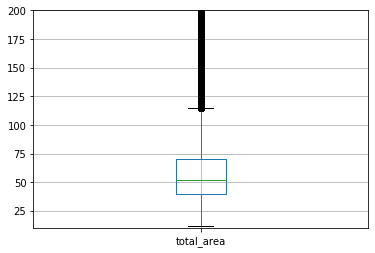

In [75]:
# Посмотирм на ящик с усами
plt.ylim(10, 200)
property_sale.boxplot(column='total_area')

Минимальное значение 12, это не  похоже на площадь даже студии и видно, что таких значений единицы.
Максимальное значение тоже очень сильно отличается от остальных.

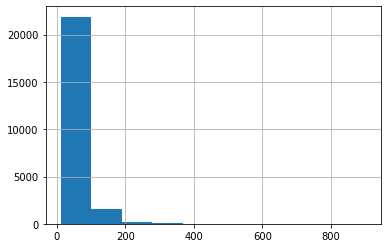

In [76]:
# построение гистограммы для интервала от минимума до максимума
property_sale['total_area'].hist(range=(12,900))

По графику видно, что основная часть выборки в пределах 200м. Рассмотрим эту часть отдельно

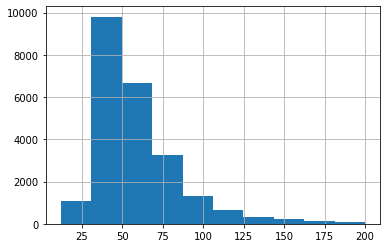

In [77]:
property_sale['total_area'].hist(range=(12,200))

График похож на распределение Пуассона.

In [78]:
#построим срез "хороших" прощадей на основании полученных сведений об "усах"
good_total_area = property_sale.query('12<=total_area<=115')
#вычисление количества хороших площадей
good_total_area['total_area'].count()

22482

Посмотрим на срез квартир больших площадей

In [79]:
big_flat=property_sale.query('total_area >=200')
big_flat

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_meter,first_day_exposition_d,first_day_exposition_m,first_day_exposition_y,share_living_area,share_kitchen_area,floor_type
155,8,96000000.0,317.0,2017-07-07,4,3.50,3.0,183.0,3,False,...,3,366.0,62,302839.12,4,7,2017,0.58,NaN,последний
464,15,66571000.0,280.3,2015-06-11,6,5.20,8.0,159.5,7,False,...,1,616.0,578,237499.11,3,6,2015,0.57,0.08,другой
492,18,95000000.0,216.0,2017-12-05,4,3.00,5.0,86.0,4,False,...,3,620.0,14,439814.81,1,12,2017,0.40,0.36,другой
509,5,90000000.0,225.0,2016-06-26,6,2.65,4.0,134.0,2,False,...,2,519.0,416,400000.00,6,6,2016,0.60,0.09,другой
521,20,25717300.0,230.1,2015-01-21,3,2.65,3.0,130.0,1,False,...,3,278.0,1441,111765.75,2,1,2015,0.56,0.11,первый
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23005,20,30750000.0,297.5,2018-09-09,6,3.14,4.0,181.8,2,False,...,3,40.0,42,103361.34,6,9,2018,0.61,0.07,другой
23281,20,24800000.0,231.2,2015-01-21,6,3.10,5.0,99.8,4,False,...,1,795.0,0,107266.44,2,1,2015,0.43,0.12,другой
23327,19,34400000.0,215.0,2019-03-15,5,2.75,4.0,82.4,4,False,...,0,NaN,0,160000.00,4,3,2019,0.38,0.19,последний
23400,17,30000000.0,213.0,2017-09-28,7,3.40,5.0,151.4,5,False,...,3,30.0,299,140845.07,3,9,2017,0.71,0.14,последний


Больших квартир в выборке 231 штука, причем цена за квадратный метр адекватная и другие колонки тоже заполнены логично. олучается, такие квартиры реально выставляют на продажу - это корректные данные. Однако, такой большой разброс может испортить анализ некоторых показателей. Поэтому будем использовать эти данные  при анализе параметров, не включающих площадь и стоимость, в остальных случаях срез good_total_area.

Рассмотрим значение параметра "последняя цена".

In [80]:
property_sale['last_price'].describe().round(2)

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Верхний ус: 6 800 000 + 1.5*(6 800 000 - 3 400 000) = 11 900 000

Нижний ус:  3 400 000 - 1.5*(6 800 000 - 3 400 000) = - 1 700 000, так как минимум больше, возьмем его.

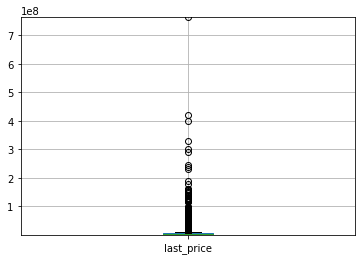

In [81]:
plt.ylim(12190,763000000)
property_sale.boxplot(column='last_price')

На таком масштабе ничего не видно, за исключением того, что максимальная цена явно выбирается из всех остальных.

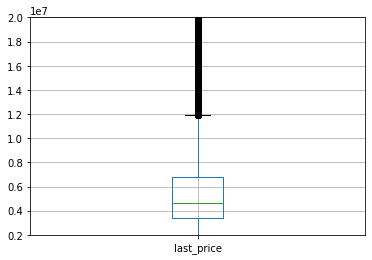

In [82]:
plt.ylim(2000000,20000000)
property_sale.boxplot(column='last_price')

Интервал выбран исходя из анализа ящика с усами, построенного на предыдущем шаге. Нижний ус невиден, так как он отрицательный. Видно, что значения за пределами верхнего уса не единичные, посмотрим на гистограмме

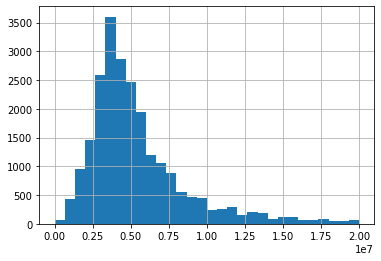

In [83]:
property_sale['last_price'].hist(bins = 30, range=(12,20000000))

Значения за пределами 11 900 000 явно есть и не единичные, но не много.

In [84]:
#построим срез "хороших" цен на основании полученных сведений об "усах"
good_last_price = property_sale.query('12<=last_price<=11900000')
#вычисление количества хороших цен
good_last_price['last_price'].count()

21665

Основная часть цен хорошие.

Рассмотрим значение параметра "комнаты".

In [85]:
property_sale['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Верхний ус: 3 + 1.5*(3 - 1) = 6

Нижний ус:  1 - 1.5*(3 - 1) = - 2, так как минимум больше, возьмем его.

Посмотрим на гистограмму по всей выборке и по интервалу между усами.

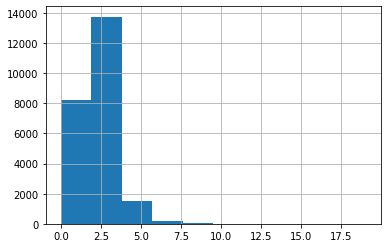

In [86]:
property_sale['rooms'].hist(range=(0,19))

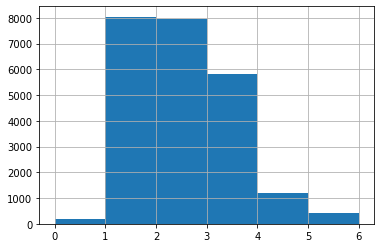

In [87]:
property_sale['rooms'].hist(bins=6, range=(0,6))

На всякий случай посмотрим значения стоимости и цены за квадратный метр для больших квартир, возможно, эти данные некорректные.

In [88]:
many_rooms=property_sale.query('rooms>=10')
many_rooms

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_meter,first_day_exposition_d,first_day_exposition_m,first_day_exposition_y,share_living_area,share_kitchen_area,floor_type
648,3,17500000.0,183.7,2018-07-01,11,3.40,7.0,138.8,7,False,...,0,NaN,0,95264.02,6,7,2018,0.76,0.07,последний
866,5,25000000.0,363.0,2017-12-23,14,3.16,5.0,222.0,4,False,...,2,435.0,418,68870.52,5,12,2017,0.61,0.05,другой
4149,6,23000000.0,272.6,2018-01-11,10,3.14,7.0,145.9,7,False,...,1,531.0,0,84372.71,3,1,2018,0.54,0.07,последний
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6.0,409.0,3,False,...,0,NaN,14,110169.49,3,2,2019,0.69,0.17,другой
9688,8,33000000.0,194.1,2017-02-07,11,3.43,5.0,129.0,2,False,...,2,66.0,813,170015.46,1,2,2017,0.66,0.06,другой
14498,6,32250000.0,374.6,2018-06-09,19,2.65,5.0,264.5,2,False,...,2,548.0,114,86091.83,5,6,2018,0.71,0.07,другой
18119,4,15500000.0,216.1,2016-07-04,10,3.15,5.0,161.4,2,False,...,0,NaN,11,71726.05,0,7,2016,0.75,0.09,другой
18848,6,28500000.0,270.0,2015-03-02,16,3.00,4.0,180.0,4,False,...,0,NaN,1365,105555.56,0,3,2015,0.67,0.05,последний
18891,11,40000000.0,290.0,2016-06-21,10,3.50,6.0,189.4,6,False,...,1,227.0,77,137931.03,1,6,2016,0.65,0.10,последний
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.7,25,False,...,2,318.0,106,466666.67,2,12,2017,0.46,0.12,последний


Цена квадратного метра кажется возможной, значит это не ошибка ручного ввода или выгрузки, а реальные объекты недвижимости.

Рассмотрим значение параметра "высота потолка". В данном столбце делалась замена пропущенных значений на медиану 2.65, скорее всего это будет очень видно на гистограмме.

In [89]:
property_sale['ceiling_height'].describe().round(2)

count    23699.00
mean         2.72
std          0.99
min          1.00
25%          2.60
50%          2.65
75%          2.70
max        100.00
Name: ceiling_height, dtype: float64

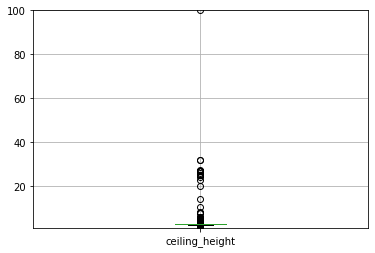

In [90]:
plt.ylim(1, 100)
property_sale.boxplot(column='ceiling_height')

Формулы:
Верхний ус = Q3 + 1,5(Q3-Q1)
Нижний ус = Q1 - 1,5(Q3-Q1)

Вычисление значений:

Верхний ус: 2.70+1.5*(2.70-2.60)=2.85

Нижний ус: 2.60-1.5*(2.70-2.60) = 2.45


Построим ящик с усами на полученном интервале, но возьмем чуть больше, чтобы увидеть границы усов. Однако, по личному опыту, в старом фонде в центре СПб основная часть домов с потолками более 3м, это необходимо учесть при анализе центрального района СПб.

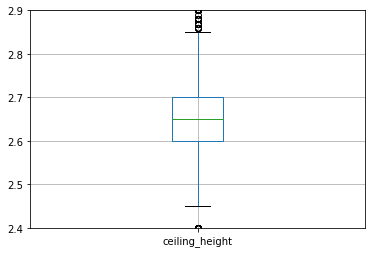

In [91]:
plt.ylim(2.40, 2.9)
property_sale.boxplot(column='ceiling_height')

In [92]:
# строим срез хороших потолков
good_ceiling=property_sale.query('2.45<=ceiling_height<=2.85')
# анализ среза хороших потолков
good_ceiling['ceiling_height'].describe().round(2)

count    20742.00
mean         2.63
std          0.08
min          2.45
25%          2.60
50%          2.65
75%          2.65
max          2.85
Name: ceiling_height, dtype: float64

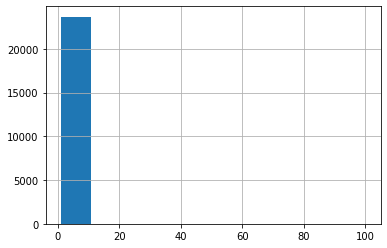

In [93]:
property_sale['ceiling_height'].hist(range=(1,100))

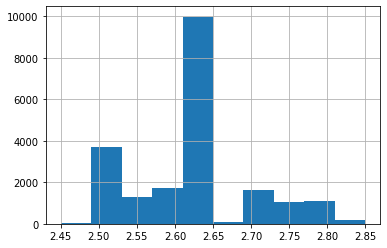

In [94]:
good_ceiling['ceiling_height'].hist()

Гистограмма выглядит хаотичной и негладкой. Не похоже ни на распределение Пуассона, ни на нормальное распределение. Пик на значении 2.65 ожидаемый - результат замены пропусков.

**Изучение связи параметров**

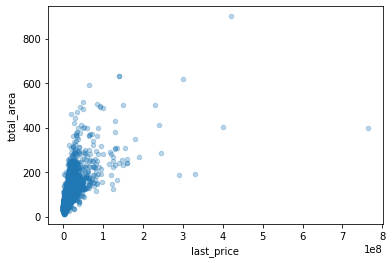

In [95]:
property_sale.plot(x='last_price', y='total_area', kind='scatter',  alpha=0.3)

In [96]:
good_price_area = (
    property_sale
    .query('12<=last_price<=21900000 & 12<=total_area<=115')
)

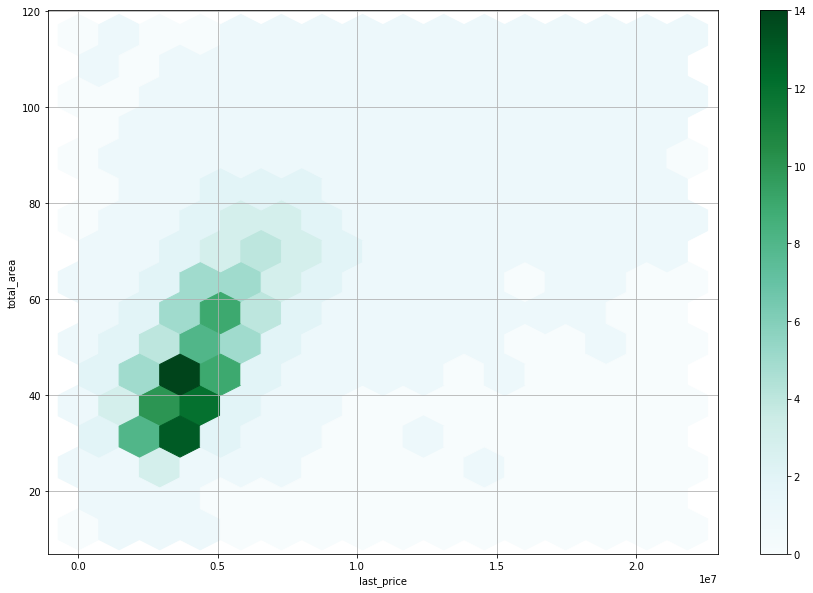

In [97]:
(good_price_area
.plot(x='last_price'
      , y='total_area'
      , kind='hexbin'
      , gridsize=15
      , figsize=(15, 10)
      , bins=15
      , sharex=False
      , grid=True)
)

По графику видно, что основная часть выборки находится до 5 000 000 руб и от 30 до 50м площади. Но вооще разброс цен и площадей очень большой.
В принципе по графику видно и зависимость параметров, чем больше площадь, тем больше цена

#### Вывод

В результате анализы были вычислены значения "усов" для параметров : высота потолка, количество комнат, цена и общая площадь. Эти сведения понадобятя в дальнейшем для устранения выбросов. Также был проведен общий анализ значений данных параметров и построены гистограммыи.

Дополнительно была изучена взаимосвязь праметров цена и площадь. В результате чего можно сдлать предположение, что скорее всего эти параметры довольно сильно зависят друг от друга.Коэффициент коррекляции будет вычислен на следущих шагах.

#### 4.2. Изучение времени продажи квартиры. Построение гистограммы. Вычисление среднего и медианы. Опиание, сколько обычно занимает продажа. Ответ на вопросы: когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

Рассмотрим время продажи квартиры.

In [98]:
property_sale['days_exposition'].describe()

count    23699.000000
mean       156.608844
std        213.546873
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [99]:
# Вычисление среднего значения
property_sale['days_exposition'].mean()

156.60884425503187

Среднее значение очень искажено из-за наличия выбросов.

In [100]:
#Вычисление медианы
property_sale['days_exposition'].median()

74.0

Слишком быстрая продажа очевидно за 0 дней, в этом месте пик на графике, но данный пик связан с заменой пропусков. В этом случае продажа либо произошла в течение дня , либо объекта недвижимости был снят с продажи по другой причине.

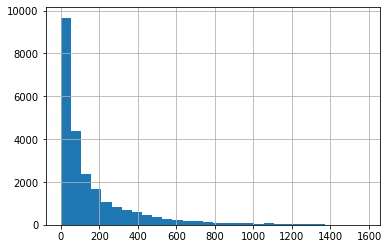

In [101]:
property_sale['days_exposition'].hist(bins=30, range=(0,1580))


По графиу видно, что после 600 дней количество уже незначительное. Возьмем 600 как верхнюю границу. Будем считать, что продажи проходили слишком долго, если количество дней продажи более 600.

In [102]:
bad_sale = property_sale.query('days_exposition > 600')
percent_bad_sale= (bad_sale['days_exposition'].count() / property_sale['days_exposition'].count() * 100).round(2)
percent_bad_sale

5.06

Процент слишком долгих продаж небольшой, всего 5%. 
Посмотрим среднее значение и медиану для "хороших" данных.

In [103]:
good_sale = property_sale.query('days_exposition <= 600')

In [104]:
# Вычисление среднего значения
good_sale['days_exposition'].mean()

119.49988889382693

In [105]:
#Вычисление медианы
good_sale['days_exposition'].median()

65.0

Получаем. что обычно продажа занимает до 600 дней.

#### Вывод

Проведя анализ сведений о времени продажи кваритры получили следующие результаты:

- Обычно продажа объекта недвижимости занимает до 600 дней.
- Быстрой продажей будем считать продажу за 0 дней, т.е объявление было на сайте менее суток.
- Долгой продажей будем считать продажу за более чем 600 дней, но таких объявлений всего 5%

**4.3. Построение "хорошего" среза данных без редких и выбивающихся значений**

Сформируем срез данных, содержащий  данные без редких и выбивающихся значений, а также  не содержащий пропуски в ключевых полях.

In [106]:
good_data = (
    property_sale
    .query(
        '12<=last_price<=21900000 & 12<=total_area<=115 & 2.45<=ceiling_height<=2.85 & 0<rooms<=6 & 1<=floors_total<=29.5 & days_exposition<=600')
    .dropna(
        subset=['floors_total', 'living_area', 'kitchen_area', 'locality_name' ]) #отбрасываем все пустые значения
    )


good_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_meter,first_day_exposition_d,first_day_exposition_m,first_day_exposition_y,share_living_area,share_kitchen_area,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,2,755.0,0,120370.37,3,3,2019,0.47,0.23,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,0,NaN,81,82920.79,1,12,2018,0.46,0.27,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,2,574.0,558,92785.71,3,8,2015,0.61,0.15,другой
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,...,0,NaN,55,95065.79,0,9,2018,0.47,0.30,другой
6,6,3700000.0,37.3,2017-11-02,1,2.65,26.0,10.6,6,False,...,0,NaN,155,99195.71,3,11,2017,0.28,0.39,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9470000.0,72.9,2016-10-13,2,2.75,25.0,40.3,7,False,...,1,806.0,519,129903.98,3,10,2016,0.55,0.15,другой
23692,2,1350000.0,30.0,2017-07-07,1,2.65,5.0,17.5,4,False,...,0,NaN,413,45000.00,4,7,2017,0.58,0.20,другой
23693,9,4600000.0,62.4,2016-08-05,3,2.60,9.0,40.0,8,False,...,1,675.0,239,73717.95,4,8,2016,0.64,0.13,другой
23695,14,3100000.0,59.0,2018-01-15,3,2.65,5.0,38.0,4,False,...,0,NaN,45,52542.37,0,1,2018,0.64,0.14,другой


В итоговом срезе получили достаточно много строк - 17689, что позволяет проводить на этом срезе анализ.

#### Вывод

Для получения среза "хороших" данных были использованы сведения об "усах" из предыдущих шагов, а также информация о пропусках в колонках. При этом пропуски в колонках типа "расстояние до парка" было решено оставить, так как убрав эти данные мы потеряем довольно большую чать выборки, к тому же эти сведения скорее всего заполнены только для СПб.
Полученный в результате срез данных сожержит большу часть основной выборки, соответсвенно его можно использовать для анализа в дальнейшем.

**4.4. Какие факторы больше всего влияют на стоимость квартиры? Изучение, зависимости цены от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучение зависимости от даты размещения: дня недели, месяца и года.**

Определим, какие факторы больше всего влияют на стоимость квартиры. Построим графики и посчитаем корреляцию.
Сначала нужно сформировать таблицу с данными. Возьмем "хорошие данные" из предыдущего шага и выберем нужные столбцы.

In [107]:
column_list = ['total_images', 'last_price', 'total_area'
       , 'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor'  
       , 'kitchen_area', 'balcony','airports_nearest', 'cityCenters_nearest'
       , 'parks_around3000', 'parks_nearest', 'ponds_around3000'
       , 'ponds_nearest', 'days_exposition', 'price_meter'
       , 'first_day_exposition_d', 'first_day_exposition_m'
       , 'first_day_exposition_y', 'share_living_area', 'share_kitchen_area'
       , 'first_day_exposition_y', 'first_day_exposition_m', 'first_day_exposition_d' ]

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


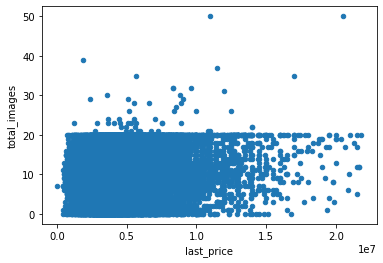

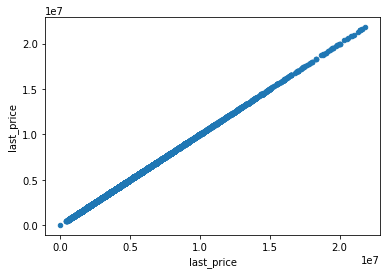

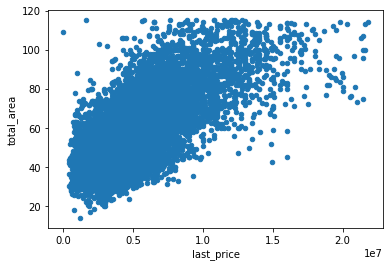

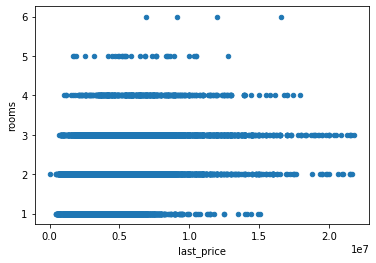

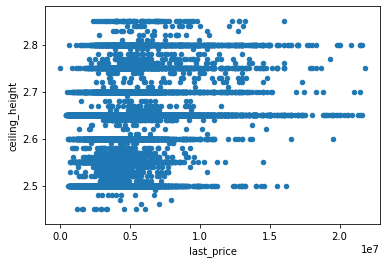

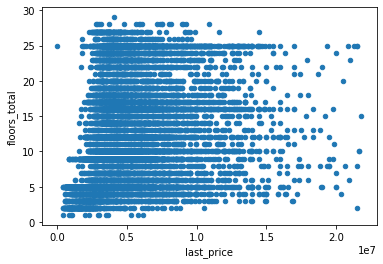

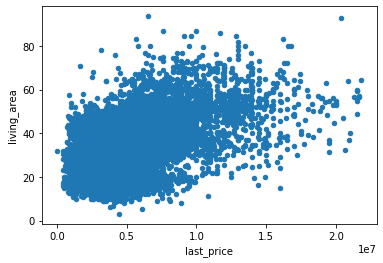

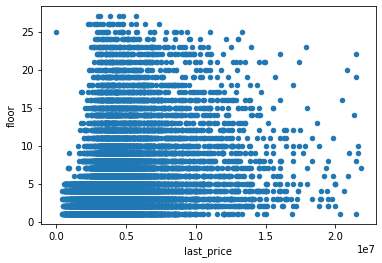

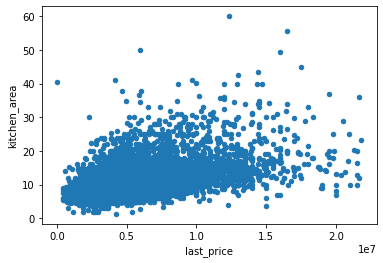

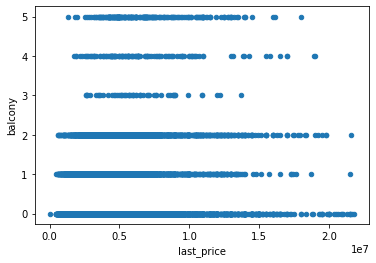

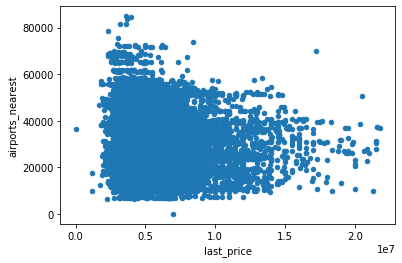

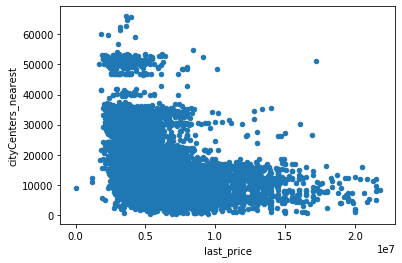

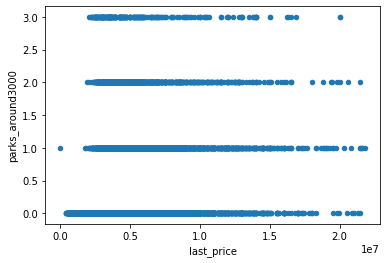

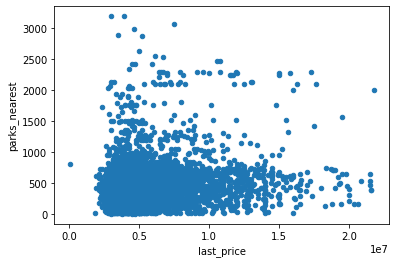

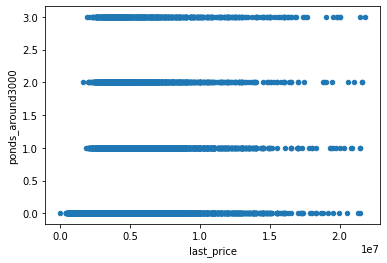

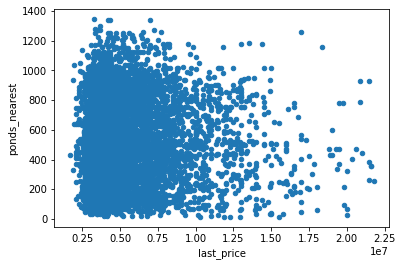

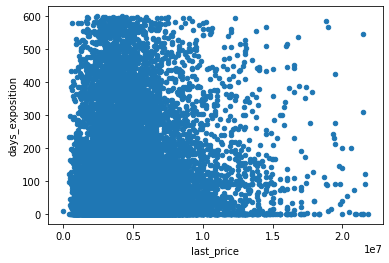

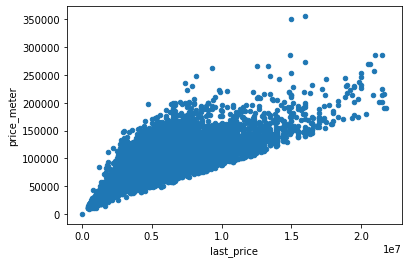

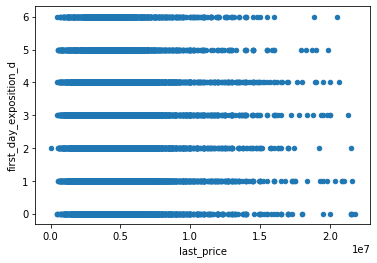

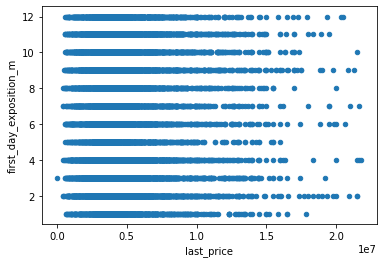

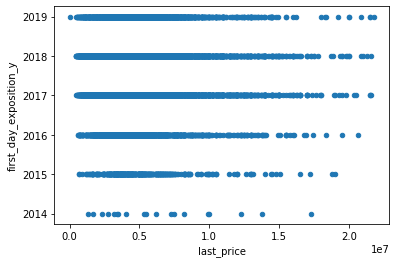

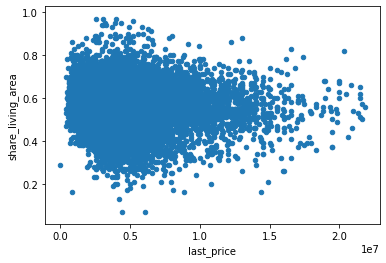

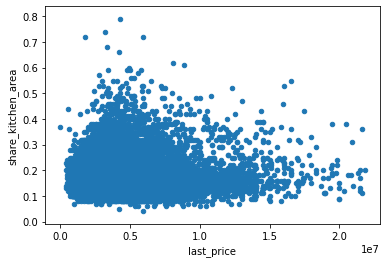

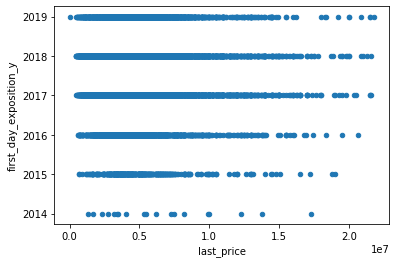

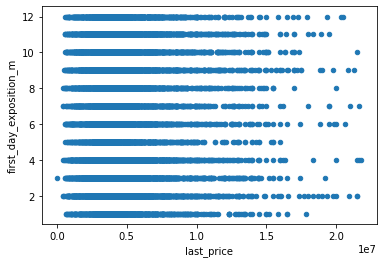

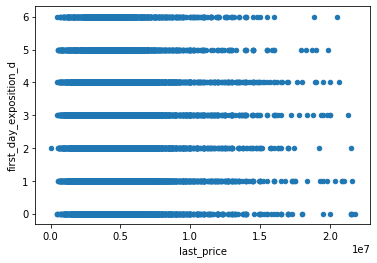

In [108]:
for name  in column_list:
    good_data.plot(x='last_price', y=name, kind='scatter')

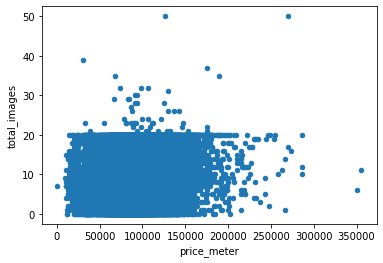

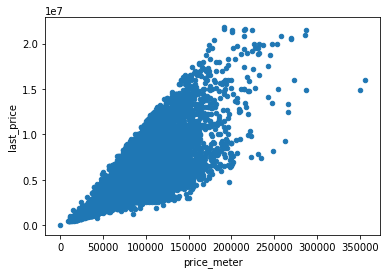

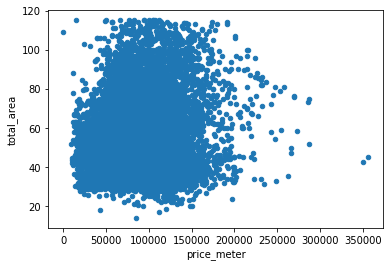

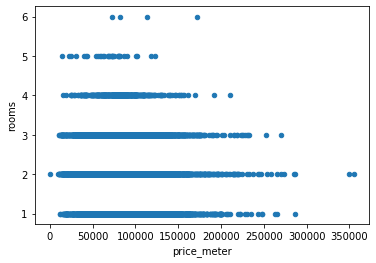

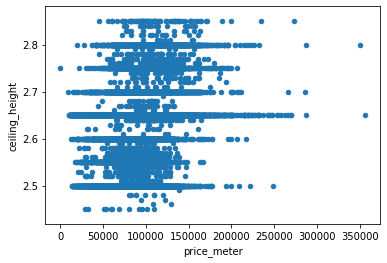

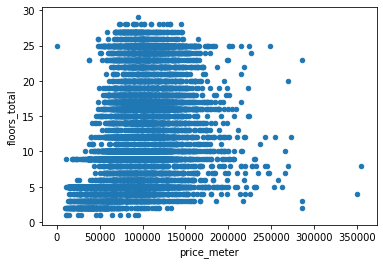

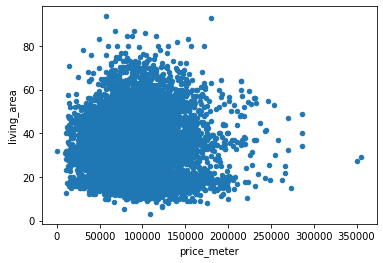

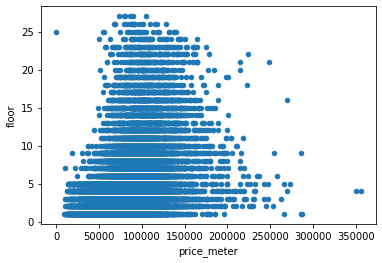

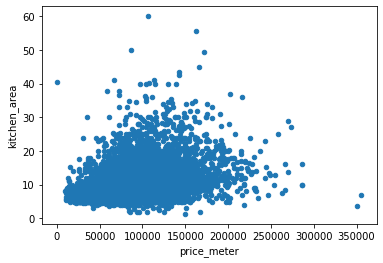

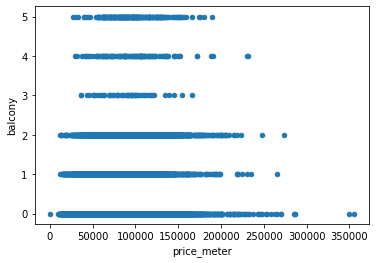

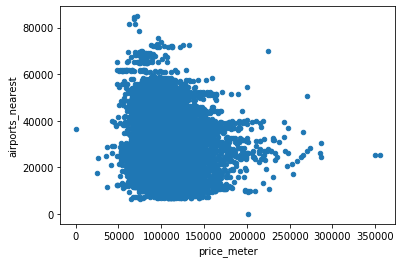

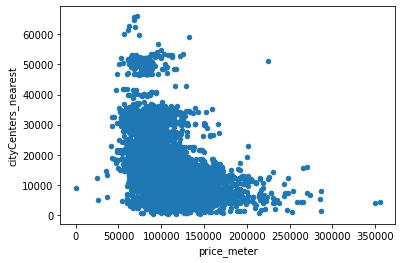

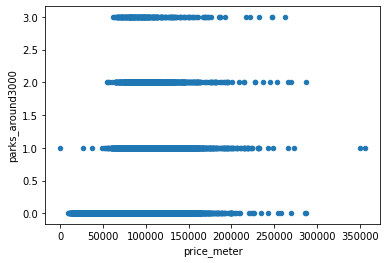

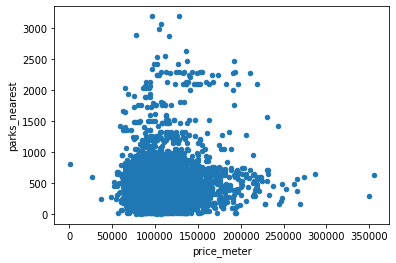

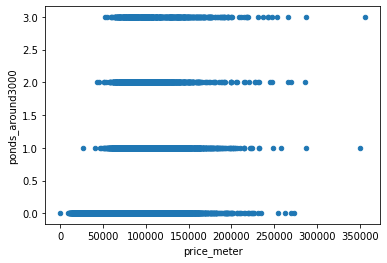

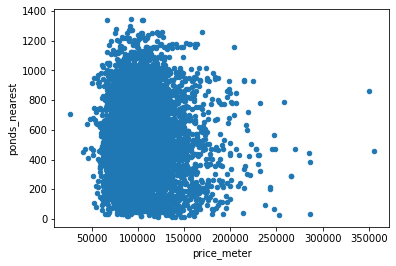

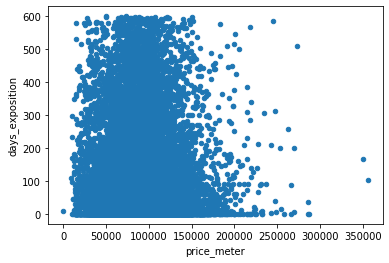

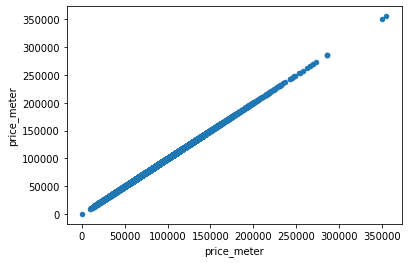

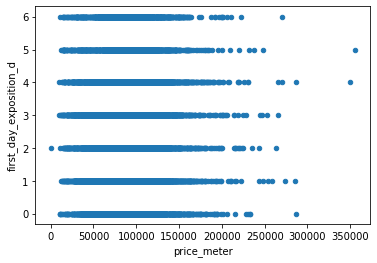

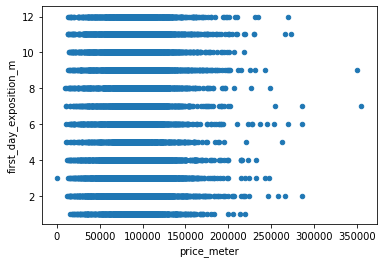

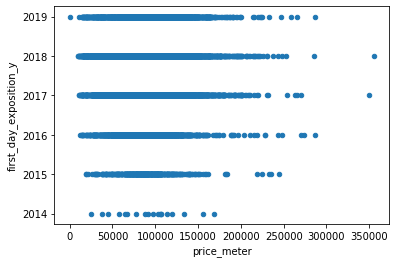

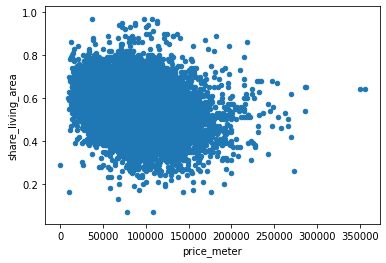

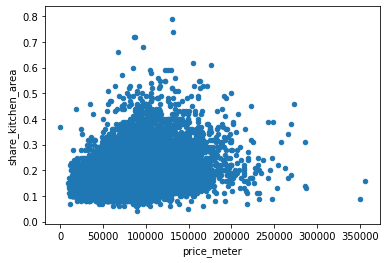

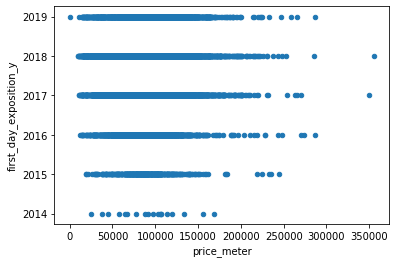

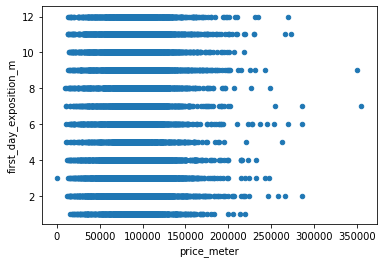

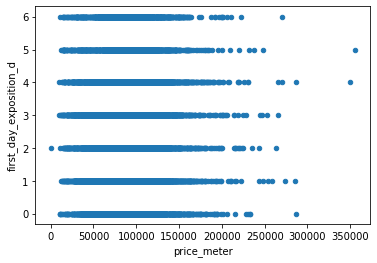

In [109]:
for name  in column_list:
    good_data.plot(x='price_meter', y=name, kind='scatter')

In [110]:
def corr_culc(data, corr_list, column):
    for name in corr_list:
        corr_data=column.corr(data[name])
        if -0.5 <= corr_data <= 0.5:
            print(name, '  Коэффициент корреляции равен {:.2f} зависимости нет'.format(corr_data))
            print()
        elif -0.8 <= corr_data <= -0.7 or 0.7 <= corr_data <= 0.8:
            print(name, '  Коэффициент корреляции равен {:.2f} в принципе зависимость есть'.format(corr_data))
            print()
        elif -1 <= corr_data < -0.8 or 0.8 < corr_data <= 1:
            print(name, ' Коэффициент корреляции равен {:.2f} есть зависимость!'.format(corr_data))
            print()
        else :
            print(name, "Коэффициент не в интервале от -1 до 1")
            print()
    
    

In [111]:
corr_culc(good_data, column_list, good_data['last_price'])

total_images   Коэффициент корреляции равен 0.19 зависимости нет

last_price  Коэффициент корреляции равен 1.00 есть зависимость!

total_area   Коэффициент корреляции равен 0.71 в принципе зависимость есть

rooms   Коэффициент корреляции равен 0.42 зависимости нет

ceiling_height   Коэффициент корреляции равен 0.28 зависимости нет

floors_total   Коэффициент корреляции равен 0.28 зависимости нет

living_area Коэффициент не в интервале от -1 до 1

floor   Коэффициент корреляции равен 0.20 зависимости нет

kitchen_area Коэффициент не в интервале от -1 до 1

balcony   Коэффициент корреляции равен 0.11 зависимости нет

airports_nearest   Коэффициент корреляции равен -0.01 зависимости нет

cityCenters_nearest   Коэффициент корреляции равен -0.30 зависимости нет

parks_around3000   Коэффициент корреляции равен 0.21 зависимости нет

parks_nearest   Коэффициент корреляции равен 0.09 зависимости нет

ponds_around3000   Коэффициент корреляции равен 0.26 зависимости нет

ponds_nearest   Коэффицие

In [112]:
# вычисление корреляции для всей таблицы
corr = good_data.corr()

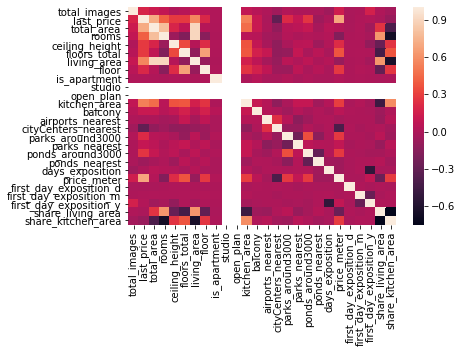

In [113]:
# построение матрицы (correlational heatmap)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

Зависимость есть только в случае total_area  и last_price.
Посмотрим ситуацию для price_meter

In [114]:
corr_culc(good_data, column_list, good_data['price_meter'])
    

total_images   Коэффициент корреляции равен 0.15 зависимости нет

last_price Коэффициент не в интервале от -1 до 1

total_area   Коэффициент корреляции равен 0.03 зависимости нет

rooms   Коэффициент корреляции равен -0.17 зависимости нет

ceiling_height   Коэффициент корреляции равен 0.22 зависимости нет

floors_total   Коэффициент корреляции равен 0.38 зависимости нет

living_area   Коэффициент корреляции равен -0.09 зависимости нет

floor   Коэффициент корреляции равен 0.27 зависимости нет

kitchen_area   Коэффициент корреляции равен 0.29 зависимости нет

balcony   Коэффициент корреляции равен 0.06 зависимости нет

airports_nearest   Коэффициент корреляции равен -0.03 зависимости нет

cityCenters_nearest   Коэффициент корреляции равен -0.40 зависимости нет

parks_around3000   Коэффициент корреляции равен 0.27 зависимости нет

parks_nearest   Коэффициент корреляции равен 0.08 зависимости нет

ponds_around3000   Коэффициент корреляции равен 0.28 зависимости нет

ponds_nearest   Коэффи

Получили, что явной зависимости стоимости квадратного метра нет, если брать всю выборку "хороших" данных

Дополнительно посчитаем коэффициент корреляции

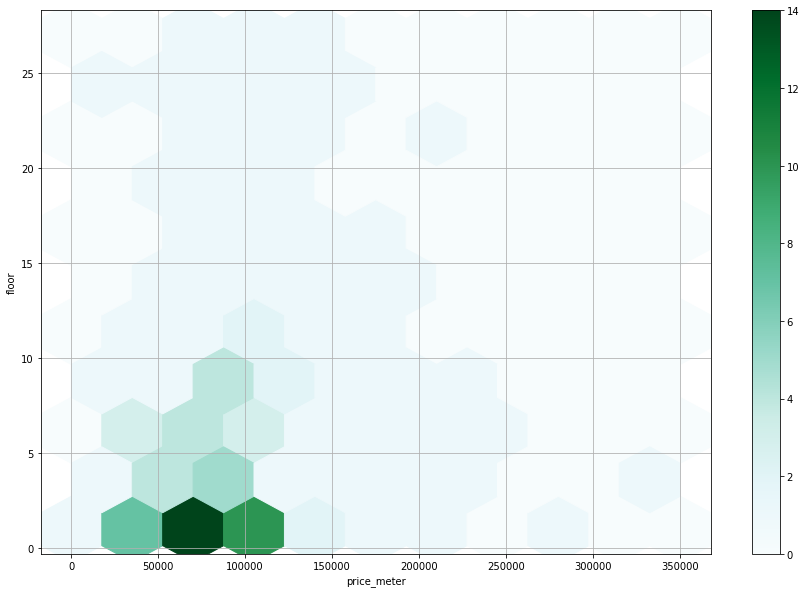

In [115]:
floor_first_last = good_data.query('floor == 1 | floor==floors_total')
floor_first_last.plot(x='price_meter'
                      , y='floor'
                      , kind='hexbin'
                      , gridsize=10
                      , figsize=(15, 10)
                      , bins=15
                      , sharex=False
                      , grid=True)

По графику видно, что самый яркий квадрат при цене квадратного метра от 50 до 100 тыс.руб и 1-5 этаж. Это если мы берем в качестве исходных данных только первые этажи и последние. При этом самая яркая часть графика в районе 1 этажа

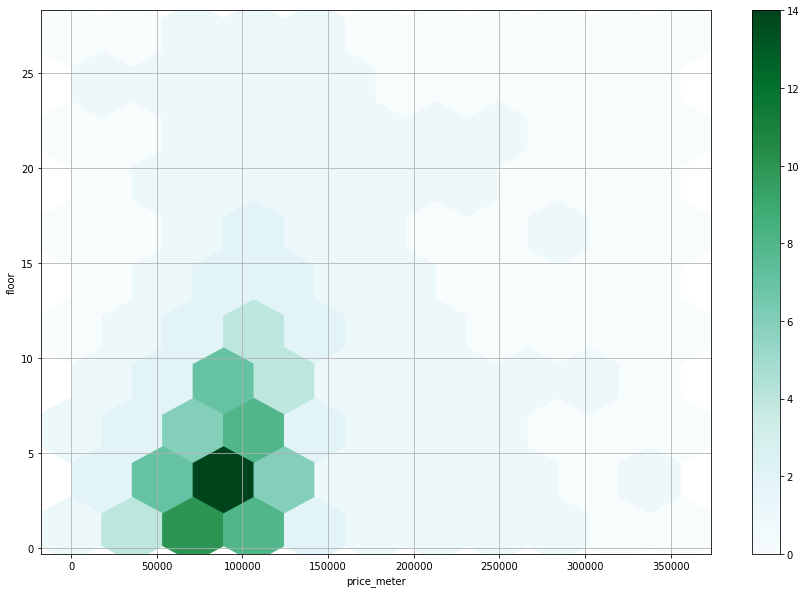

In [116]:
good_data.plot(x='price_meter', y='floor', kind='hexbin', gridsize=10, figsize=(15, 10), bins=15, sharex=False, grid=True)

В случае, если берем все "хорошие" данные, то самая яркая часть сдвигается в том же квадрате 50-100тыс.руб за кв метр ближе к 5 этажу.

In [117]:
group_type_floor=(good_data.pivot_table(index='floor_type', values='price_meter', aggfunc=['count','median', 'mean']))
group_type_floor

,count,median,mean
,price_meter,price_meter,price_meter
floor_type,,,
другой,12587,96153.850,96797.068540
первый,2034,79333.715,77754.504700
последний,2244,83661.400,83009.405143


Самое маленькое среднее значение цены за квадратный метр для первого этажа, самое большое - для не первого и не последнего.

#### Вывод

Анализ данных показал наличие в явном виде зависимости цены только от общей площади. Есть небольшая зависимость цены от количества комнат и раастояния до центра,но коэффициент коррекляции о этих случаях не дотягивает даже до 0.5 по модулю.
Если же анализировать зависимости от цены за квадратный метр, то получаем, что нет вообще ни одной явной зависимости. Из графиков и коэффициентов корреляции хоть сколько-то  большими (при этом меньше 0.5 по модулю) являются значения параметров расстояние до центра, высота потолков и количество этажей и этаж.
Зависимости от месяца, дня недели, месяца и года в явном виде не обнаружено.

В целом получаем, что для определения явной зависимости и выделения параметров явно влияющих на стоимость не хватает параметров. Как вариант этими параметрами могут быть: район города, год постройки дома, материал(кирпич/панелька), расстояние до метро.
Выявленная зависимость общей площади от цены не является открытием, это скорее очевидный факт. Однако и тут могут быть особенности в завиимости от новизны и качества дома.

**4.5. Выбор 10 населённых пунктов с наибольшим числом объявлений. Рачет средней цены квадратного метра в этих населённых пунктах.  Выделение населённых пунктов с самой высокой и низкой стоимостью жилья.**

Выбор 10 населенных пунктов с наибольшим числом объявлений:

In [118]:
# Срез 10 населенных пунктов с самым большим числом объявлений
locality_top= property_sale['locality_name'].value_counts().sort_values(ascending=False).head(10)
locality_top

санкт-петербург    15721
мурино               590
кудрово              472
шушары               440
всеволожск           398
пушкин               369
колпино              338
парголово            327
гатчина              307
выборг               237
Name: locality_name, dtype: int64

Для наглядности построим круговую диаграмму для топ-10 населенных пунктов по количеству объявлений.

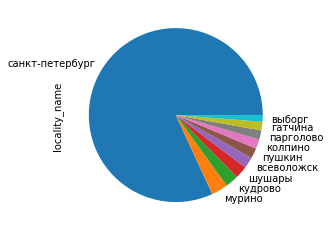

In [119]:
locality_top.plot(kind='pie')

Добавим столбец locality_top для отражения групировки на топ-10 и другие (все сотальные населенные пункты).

In [120]:
property_sale['locality_top']=(property_sale['locality_name']
                               .where(property_sale['locality_name']
                                      .isin(locality_top.index)
                                      , 'Другие'))
property_sale.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_meter,first_day_exposition_d,first_day_exposition_m,first_day_exposition_y,share_living_area,share_kitchen_area,floor_type,locality_top
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,755.0,0,120370.37,3,3,2019,0.47,0.23,другой,санкт-петербург
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,NaN,81,82920.79,1,12,2018,0.46,0.27,первый,шушары
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,574.0,558,92785.71,3,8,2015,0.61,0.15,другой,санкт-петербург
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,...,234.0,424,408176.10,4,7,2015,NaN,NaN,другой,санкт-петербург
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,48.0,121,100000.00,1,6,2018,0.32,0.41,другой,санкт-петербург


Цена за квадратный метр в зависимости от населенного пункта. Возьмем населенные пункты из топ-10, а все остальные объединенные в группу "Другие" и сформируем сводную таблицу содержащую количество объявлений, среднюю цену за квадратный метр и медиану цены за квадратный метр.

In [121]:
# сводная таблица 
location_price_meter = (
    property_sale
    .sort_values(by='price_meter', ascending=False)
    .pivot_table(index='locality_top', 
                 values='price_meter', 
                 aggfunc=['count','mean', 'median'])
    .sort_values(by = ('mean','price_meter'), ascending=False)
)
location_price_meter

,count,mean,median
,price_meter,price_meter,price_meter
locality_top,,,
санкт-петербург,15721,114849.008793,104761.900
пушкин,369,103125.819377,100000.000
кудрово,472,95324.930508,95675.475
парголово,327,90175.913089,91642.860
мурино,590,86087.512017,86175.640
шушары,440,78677.364318,76876.175
колпино,338,75424.579112,74723.745
гатчина,307,68746.146515,67796.610


Посмотрим, есть ли отличие от такой же сводной таблицы, но по "хорошим" данным.

In [122]:
good_data = (
    property_sale
    .query(
        '12<=last_price<=21900000 & 12<=total_area<=115 & 2.45<=ceiling_height<=2.85 & 0<rooms<=6 & 1<=floors_total<=29.5 & days_exposition<=600')
    .dropna(
        subset=['floors_total', 'living_area', 'kitchen_area', 'locality_name' ]) #отбрасываем все пустые значения
    )

In [123]:
location_price_meter = (
    good_data
    .sort_values(by='price_meter', ascending=False)
    .pivot_table(index='locality_top', 
                 values='price_meter', 
                 aggfunc=['count','mean', 'median'])
    .sort_values(by = ('mean','price_meter'), ascending=False)
)
location_price_meter

,count,mean,median
,price_meter,price_meter,price_meter
locality_top,,,
санкт-петербург,10717,106422.062099,102105.260
пушкин,263,100986.543916,98493.150
кудрово,351,95554.659544,96119.930
парголово,279,90581.856595,92051.280
мурино,440,85940.565705,85685.715
шушары,372,78358.615027,76876.175
колпино,291,75217.917629,74722.220
гатчина,256,68639.862461,67180.705


Разница в данных незначительная.
Посмотрим на такую же сводную таблицу по данным общей стоимости квартир

In [124]:
location_price = (
    property_sale
    .pivot_table(index='locality_top', 
                 values='last_price', 
                 aggfunc=['count','mean', 'median'])
    .sort_values(by = ('mean', 'last_price'), ascending=False)
)
location_price

,count,mean,median
,last_price,last_price,last_price
locality_top,,,
санкт-петербург,15721,8.062507e+06,5500000.0
пушкин,369,6.469036e+06,5180000.0
парголово,327,4.488075e+06,4100000.0
кудрово,472,4.358688e+06,3890000.0
шушары,440,4.108082e+06,3950000.0
колпино,338,3.964021e+06,3600000.0
всеволожск,398,3.789068e+06,3450000.0
мурино,590,3.678462e+06,3400000.0


#### Вывод

В результате анализа получено, что самое дешевое жилье из топ-10 в Выборге, ну и еще немного дешевле в других населенных пунктах не из топ-10.

Самое дорогое жилье в Санкт-Петербурге, причем значения Петербурга и Выборга отличаются более чем в два раза. 
Если рассматривать с точки зрения стоимости за квадратный метр, то данные такие же, Санкт-Петребург самый дорогой, Выборг и Другие самые дешевые.

Удивительно, но и по количеству объявлений, на первом месте Петерубург , а замыкает топ-10 Выборг.

По общей стоимости также надо отметить, что Санкт-Петербург и Пушкин выделяются по цене за квартиры, а все остальные населенные пункты в принципе не сильно отличаются по цене.

**4.6 Изучение предложения квартир(информация о расстоянии до центра). Выделение квартир в Санкт-Петербурге. Выяснение, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. Расчет средней цены для каждого километра. График: зависимости цены от удалённости от центра. Определение границы, где график сильно меняется — это и будет центральная зона.**

Сформируем новый столбик в таблице - расстояние до центра в километрах. И сразу переведем его тип в целочисленный

In [125]:
#создание столбца cityCenters_nearest_km и округление значений до целых
property_sale['cityCenters_nearest_km'] = (property_sale['cityCenters_nearest']/ 1000).round(0)

In [126]:
#изменение типа данных
property_sale['cityCenters_nearest_km']= pd.to_numeric(property_sale['cityCenters_nearest_km']
                                                       , errors='coerce'
                                                       , downcast = 'integer')

In [127]:
# формирование среза данных для города Санкт-петербург и исключение пропусктов в cityCenters_nearest
spb_property_sale = property_sale.query('locality_name == "санкт-петербург" & cityCenters_nearest not in "NaN"')
spb_property_sale['cityCenters_nearest_km'].count()

15660

In [128]:
spb_property_sale_sort= spb_property_sale['cityCenters_nearest_km'].value_counts().sort_values(ascending=False)
spb_property_sale_sort

12.0    1605
15.0    1568
13.0    1457
14.0    1279
16.0    1265
11.0    1178
5.0      920
17.0     883
10.0     719
4.0      688
6.0      618
8.0      597
9.0      593
7.0      420
3.0      350
2.0      310
18.0     261
22.0     202
1.0      192
19.0     157
21.0     117
23.0      85
26.0      53
20.0      49
0.0       27
24.0      26
25.0      26
28.0       7
29.0       6
27.0       2
Name: cityCenters_nearest_km, dtype: int64

Видно, что преобладает количество объявлений в Санкт-Петербурге на 10-17 км от центра.

Построим сводную таблицу, где для каждого километра будут приведены данные по количеству объявлений, средней цене и медианы цены квартиры.

In [129]:
km_center_price = (
    spb_property_sale
    .pivot_table(index='cityCenters_nearest_km', 
                 values='last_price', 
                 aggfunc=['count','mean', 'median'])
    .sort_values(by = ('cityCenters_nearest_km'), ascending=True)
)
km_center_price

,count,mean,median
,last_price,last_price,last_price
cityCenters_nearest_km,,,
0.0,27,3.144912e+07,17900000.0
1.0,192,2.120672e+07,11395000.0
2.0,310,1.778832e+07,10000000.0
3.0,350,1.112658e+07,8409000.0
4.0,688,1.330428e+07,9200000.0
5.0,920,1.449912e+07,9500000.0
6.0,618,1.533842e+07,8900000.0
7.0,420,1.477515e+07,7800000.0


Дополнительно построим график по этим параметрам. И рассчитаем коэффициент корреляции

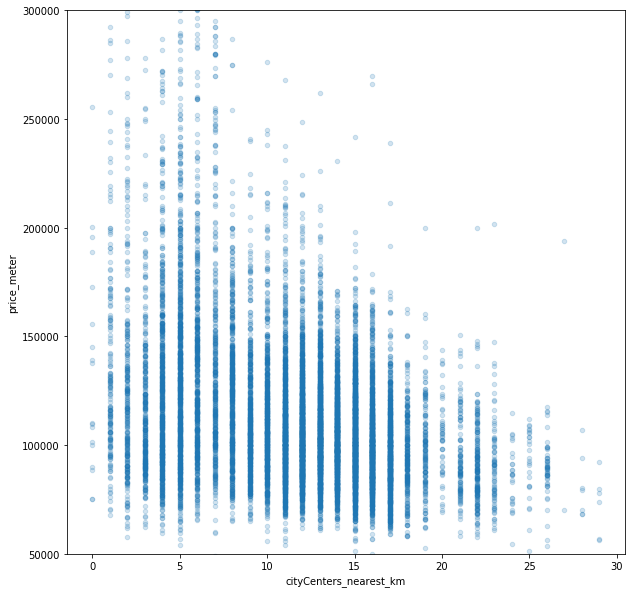

In [130]:
spb_property_sale.plot(x='cityCenters_nearest_km'
                       , y='price_meter'
                       , kind='scatter'
                       , figsize=(10, 10)
                       , ylim=(50000, 300000)
                       ,  alpha=0.2)

In [131]:
corr_data_spb=spb_property_sale['cityCenters_nearest_km'].corr(spb_property_sale['last_price'])
corr_data_spb

-0.2593987607930819

Коэффициент корреляции не показал явной зависимости параметров.

#### Вывод

По сводной таблице и графику видно, что центральный район имеет радиус 7 км. После этого значения есть заметный спад стоимости квартир.
Однако, коэфиициент корреляции -0,26 показывает, что явной зависимости между этими параметрами нет.
На высоких этажах выше 15 минимум стоимости квадратного метра больше, но максимум меньше, чем на более низких этажах.

**4.7 Выделение сегмента квартир в центре. Анализ этой территории и изучиение параметров: площадь, цена, число комнат, высота потолков. Выведение факторов, влияющих на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Выводы. Отличаются ли они от общих выводов по всему городу?**

Сформируем срез данных для центра Санкт-Петербурга

In [132]:
# формирование среза центра СПб
spb_center = (spb_property_sale.query('0<=cityCenters_nearest_km<=7'))

In [133]:
# формирование сводной таблицы
spb_center_price = (
    spb_center
    .pivot_table(index=('cityCenters_nearest_km', 'floor_type') 
                 ,values='last_price' 
                 ,aggfunc=['count','mean', 'median'])
    .sort_values(by = ('mean', 'last_price'), ascending=False)
)
spb_center_price

,,count,mean,median
,,last_price,last_price,last_price
cityCenters_nearest_km,floor_type,,,
0.0,другой,20,3.556015e+07,22450000.0
1.0,последний,46,2.304692e+07,10050000.0
0.0,последний,4,2.243077e+07,18999500.0
1.0,другой,122,2.168691e+07,12000000.0
2.0,последний,81,2.113140e+07,10500000.0
6.0,последний,98,2.045390e+07,8775000.0
5.0,последний,144,1.913129e+07,10500000.0
2.0,другой,184,1.847547e+07,11250000.0


Самыми дорогими оказались квартиры в самом центре на этаже отличающемся от первого и последнего, а самыми дешевыми квартиры на первом этаже на расстоянии 4 км от центра.

Посмотрим на графики 

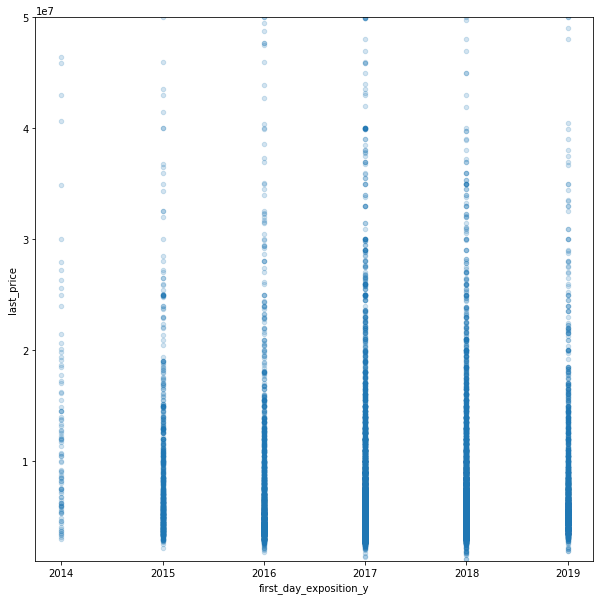

In [134]:
spb_property_sale.plot(x='first_day_exposition_y'
                       , y='last_price'
                       , kind='scatter'
                       , figsize=(10, 10)
                       , ylim=(1000000, 50000000)
                       ,  alpha=0.2)

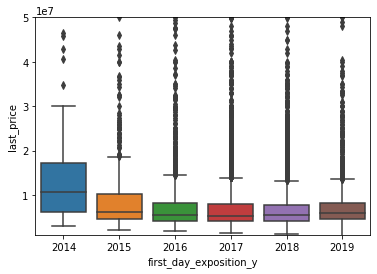

In [145]:
plt.ylim(1000000, 50000000)
sns.boxplot(y=spb_property_sale["last_price"], x=spb_property_sale["first_day_exposition_y"]);
plt.show()

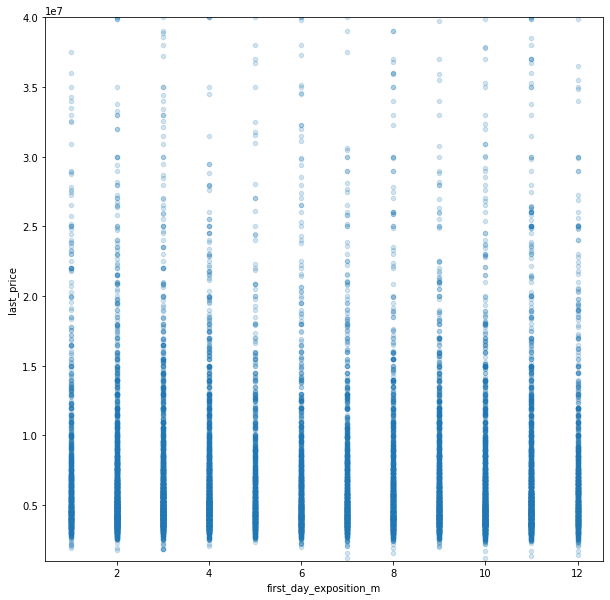

In [136]:
spb_property_sale.plot(x='first_day_exposition_m'
                       , y='last_price'
                       , kind='scatter'
                       , figsize=(10, 10)
                       , ylim=(1000000, 40000000)
                       ,  alpha=0.2)

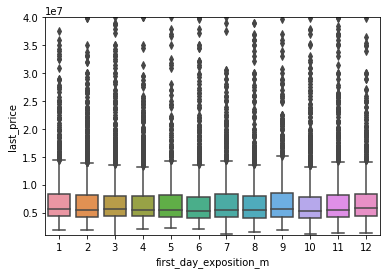

In [148]:
plt.ylim(1000000, 40000000)
sns.boxplot(y=spb_property_sale["last_price"], x=spb_property_sale["first_day_exposition_m"]);
plt.show()

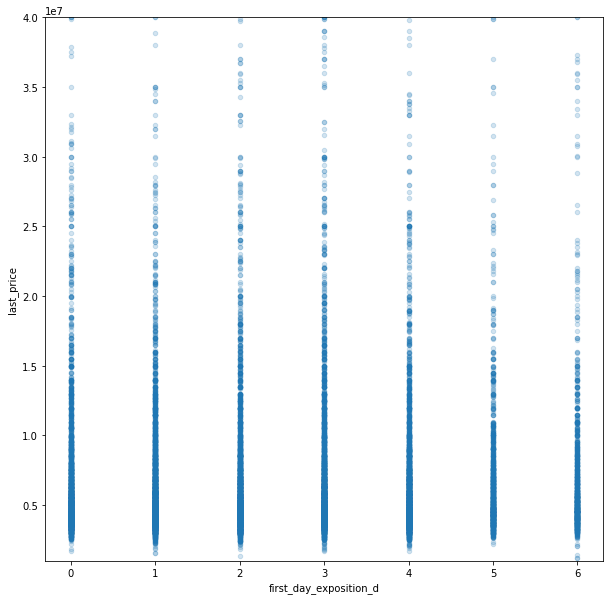

In [149]:
spb_property_sale.plot(x='first_day_exposition_d'
                       , y='last_price'
                       , kind='scatter'
                       , figsize=(10, 10)
                       , ylim=(1000000, 40000000)
                       ,  alpha=0.2)

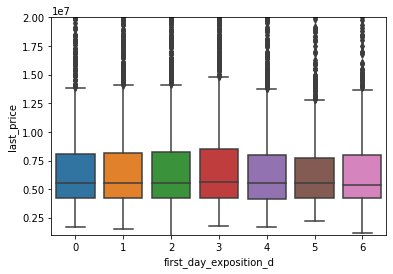

In [152]:
plt.ylim(1000000, 20000000)
sns.boxplot(y=spb_property_sale["last_price"], x=spb_property_sale["first_day_exposition_d"]);
plt.show()

По графикам видно, что в 2017 и 2018 годы были самые дорогие квартиры.По месяцам некоторый спад виден летом, но не существенный. По дням недели самыми дорогими оказались будние дни.

In [138]:
list_spb = (['last_price', 'price_meter', 'total_area', 'rooms', 'ceiling_height', 'floor'
             , 'cityCenters_nearest_km', 'first_day_exposition_y', 'first_day_exposition_m', 'first_day_exposition_d'])

In [139]:
corr_culc(spb_center, list_spb, spb_center['last_price'])

last_price  Коэффициент корреляции равен 1.00 есть зависимость!

price_meter   Коэффициент корреляции равен 0.80 в принципе зависимость есть

total_area Коэффициент не в интервале от -1 до 1

rooms   Коэффициент корреляции равен 0.31 зависимости нет

ceiling_height   Коэффициент корреляции равен 0.07 зависимости нет

floor   Коэффициент корреляции равен 0.11 зависимости нет

cityCenters_nearest_km   Коэффициент корреляции равен -0.04 зависимости нет

first_day_exposition_y   Коэффициент корреляции равен -0.05 зависимости нет

first_day_exposition_m   Коэффициент корреляции равен -0.01 зависимости нет

first_day_exposition_d   Коэффициент корреляции равен 0.03 зависимости нет



In [140]:
corr_culc(spb_center, list_spb, spb_center['price_meter'])

last_price   Коэффициент корреляции равен 0.80 в принципе зависимость есть

price_meter  Коэффициент корреляции равен 1.00 есть зависимость!

total_area   Коэффициент корреляции равен 0.25 зависимости нет

rooms   Коэффициент корреляции равен -0.00 зависимости нет

ceiling_height   Коэффициент корреляции равен 0.04 зависимости нет

floor   Коэффициент корреляции равен 0.12 зависимости нет

cityCenters_nearest_km   Коэффициент корреляции равен -0.02 зависимости нет

first_day_exposition_y   Коэффициент корреляции равен 0.01 зависимости нет

first_day_exposition_m   Коэффициент корреляции равен -0.02 зависимости нет

first_day_exposition_d   Коэффициент корреляции равен 0.02 зависимости нет



В результате получаем, что зависимостей нет за исключением, цена за метр и цена общая. Даже общая площадь не коррелирует с ценой за квартиру и ценой за квадратный метр.

#### Вывод

При анализе общей выборки была выявлена зависимость площади квартиры от цены, хдесь же, коэффициент корреляции не дотягивает даже до 0.5 по модулю.
Кроме того, анализ показал самые высокие цены на квартиры в 2017 и 2018 годах, при этом от месяца и дня недели, цена существенно не зависит.

### Шаг 5. Общий вывод

В рамках задачи был проведен анализ данных сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.
Каждая строка выборки содержит информацию об одном объекте недвижимости, выставленном на продажу.
Была выполнена подготовка данных в том числе устранение пропусков, где возможно, избавление от дублей в названиях населенных пунктах. Следует отметить, что расхождение в названиях населенных пунктов (например, Кудрово и Кудрово деревня) в некоторых случаях может быть связано со сменой типа населенного пункта за годы выборки, либо это ошбика присвоения наименования.

Далее был проведен агализ данных по инструкиции.
Получили, что единственным явно влияющим на цену квартиры фактором является общая площадь.
Есть факторы немного влияющие, такие как: расстояние от центра(где это есть), высота потолка, год подачи объявления, количество комнат и этаж, однако, данные параметры более сложные и для выяснения их влияния на стоимость необходимо больше дополнительных сведений об объекте недвижимости. Не хватает таких сведений как: расстояние до метро, тип дома(кирпич/панелька/сталинка), район города.
Самая дорогая недвижимость по результатм анализа в Санкт-Петреборге, с самая дешевая в Выборге и других населенных пунктах, не входящих в топ-10 по количеству объявлений.